In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from util.measure_utils import *
from util.common_utils import *
from util.visual_utils import *
from util.gaussian_util import *

/home/ayw/anaconda3/envs/torch/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


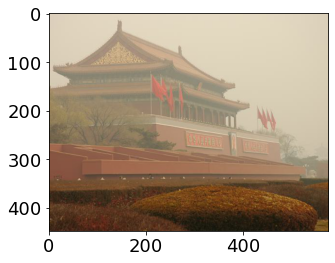

In [5]:
path = '/home/ayw/Documents/DoubleDIP/output/'
origin = Image.open(os.path.join(path, 'tiananmen_original.jpg'))
plt.imshow(origin)
plt.show()

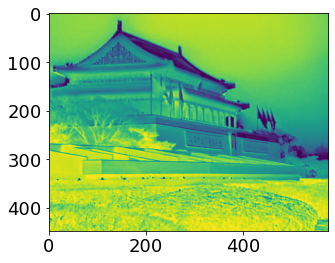

In [6]:
mask = Image.open(os.path.join(path, 'tiananmen_0_t.jpg'))
plt.imshow(mask)
plt.show()

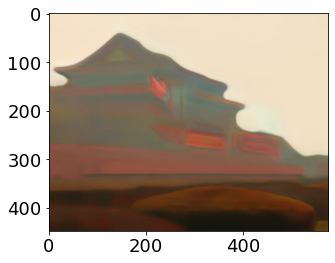

In [7]:
learn = Image.open(os.path.join(path, 'tiananmen_0_learned.jpg'))
plt.imshow(learn)
plt.show()

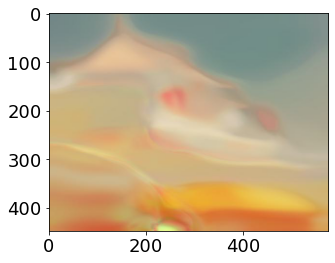

In [17]:
a = Image.open(os.path.join(path, 'tiananmen_0_a.jpg'))
plt.imshow(a)
plt.show()

[]

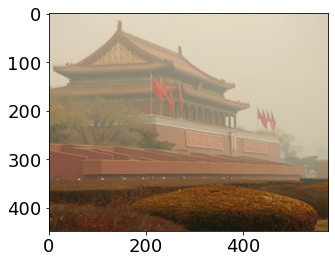

In [18]:
out = np_to_pil(pil_to_np(mask) * pil_to_np(learn) + (1-pil_to_np(mask)) * pil_to_np(a))
plt.imshow(out)
plt.plot()

/tmp/ipykernel_24899/3423341845.py:1: RuntimeWarning: divide by zero encountered in divide
  res = np_to_pil((pil_to_np(origin) - (1-pil_to_np(mask)) * pil_to_np(a))/pil_to_np(mask))
/tmp/ipykernel_24899/3423341845.py:1: RuntimeWarning: invalid value encountered in divide
  res = np_to_pil((pil_to_np(origin) - (1-pil_to_np(mask)) * pil_to_np(a))/pil_to_np(mask))


[]

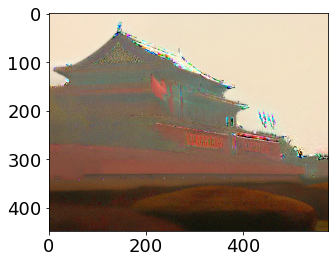

In [19]:
res = np_to_pil((pil_to_np(origin) - (1-pil_to_np(mask)) * pil_to_np(a))/pil_to_np(mask))
plt.imshow(res)

In [22]:
from cv2.ximgproc import guidedFilter

def t_matting(mask_out_np):
    refine_t = guidedFilter(pil_to_np(origin).transpose(1, 2, 0).astype(np.float32),
                            mask_out_np[0].astype(np.float32), 50, 1e-4)
    return np.array([np.clip(refine_t, 0, 1)])

mask_out_np = t_matting(pil_to_np(mask))
post = np.clip((pil_to_np(origin) - ((1 - mask_out_np) * pil_to_np(a))) / mask_out_np, 0, 1)

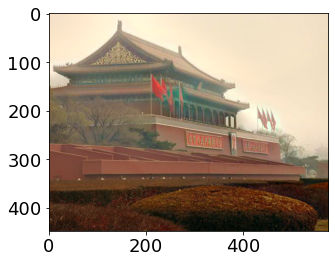

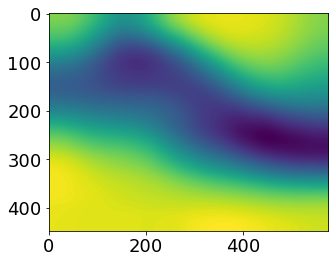

In [23]:
plt.imshow(np_to_pil(post))
plt.show()
plt.imshow(np_to_pil(mask_out_np))
plt.show()

(512, 512)
(1, 512, 512)


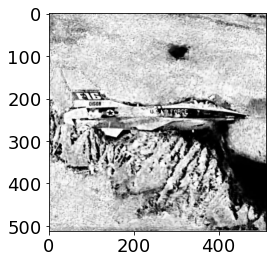

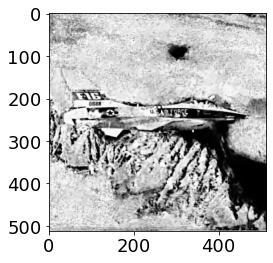

True

In [59]:
noise_dec = Image.open(os.path.join(path, 'F16_0_t.jpg'))
ar = np.array(noise_dec)
print(ar.shape)
noise_dec_np = pil_to_np(noise_dec)
print(noise_dec_np.shape)
plt.imshow(noise_dec,cmap='gray')
plt.show()

import cv2
cvread = cv2.imread(os.path.join(path, 'F16_0_t.jpg'))

for i in range(0,10):
    cvread = cv2.fastNlMeansDenoising(cvread, h=7.0)
    if i%10 == 0:
        plt.imshow(cvread)
        plt.show()

cv2.imwrite(os.path.join(path, 'output.png'), cvread)

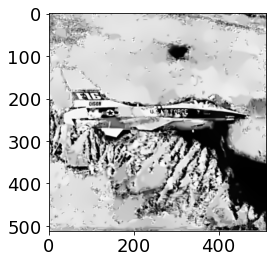

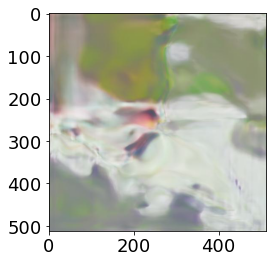

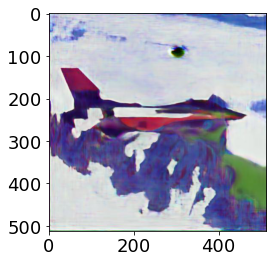

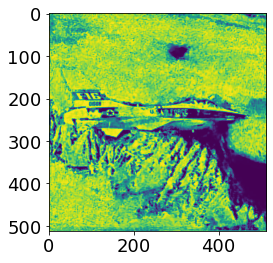

(1, 512, 512)
(3, 512, 512)


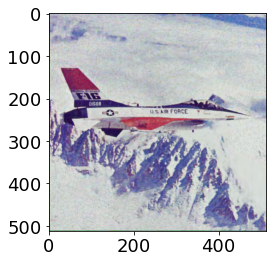

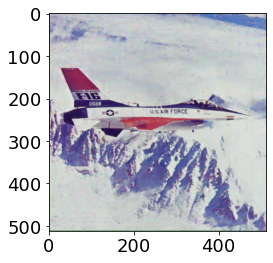

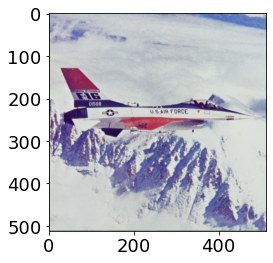

29.4386647095758
28.97126274434075


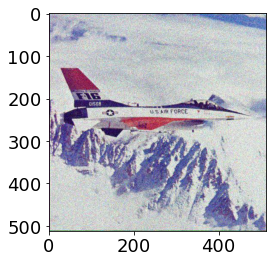

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


In [65]:
def read(name):
    pil = Image.open(os.path.join(path, name))
    plt.imshow(pil)
    plt.show()
    return pil, pil_to_np(pil)

mask, mask_np = read('output.png')
a, a_np = read('F16_0_a.jpg')
learn, learn_np = read('F16_0_learned.jpg')
t, t_np = read('F16_0_t.jpg')
print(t_np.shape)
print(mask_np.shape)

origin_noise = t_np * learn_np + (1-t_np) * a_np
plt.imshow(np_to_pil(origin_noise))
plt.show()

new_noise = mask_np * learn_np + (1-mask_np) * a_np
plt.imshow(np_to_pil(new_noise))
plt.show()

np_to_pil(new_noise).save(os.path.join(path, 'my.png'))

clean, clean_np = read('F16_clean_original.jpg')
print(compare_psnr(clean_np, new_noise))
print(compare_psnr(clean_np, origin_noise))

read_noise, read_noise_np = read('F16_0_original.jpg')
print(new_noise == read_noise_np)
np_to_pil(origin_noise).save(os.path.join(path, 'should.png'))

/tmp/ipykernel_24899/1708456649.py:1: RuntimeWarning: divide by zero encountered in divide
  next_base = (read_noise_np - (1 - t_np) * a_np) / (t_np )
/tmp/ipykernel_24899/1708456649.py:1: RuntimeWarning: invalid value encountered in divide
  next_base = (read_noise_np - (1 - t_np) * a_np) / (t_np )
/tmp/ipykernel_24899/1708456649.py:2: RuntimeWarning: invalid value encountered in multiply
  new_noise = mask_np * next_base + (1-mask_np) * a_np


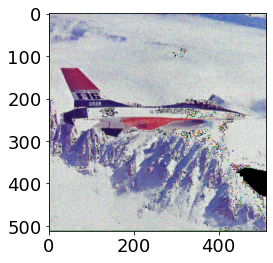

nan


In [70]:
next_base = (read_noise_np - (1 - t_np) * a_np) / (t_np )
new_noise = mask_np * next_base + (1-mask_np) * a_np
plt.imshow(np_to_pil(new_noise))
plt.show()
print(compare_psnr(clean_np, new_noise))
np_to_pil(new_noise).save(os.path.join(path, 'badout.png'))